# Generate D-efficient designs

This notebook contains example code from the article [Two-level designs to estimate all main effects and two-factor interactions](https://doi.org/10.1080/00401706.2016.1142903) by Eendebak, P. T. and Schoen, E. D.
This example shows how to generate D-efficient designs with a user-specified optimization function.

In [1]:
import numpy as np

import oapackage
import oapackage.Doptim

%matplotlib inline

Define the class of designs to generate.

In [2]:
run_size = 40
number_of_factors = 7
factor_levels = 2
strength = 0
arrayclass = oapackage.arraydata_t(factor_levels, run_size, strength, number_of_factors)
print("We generate D-efficient designs with %d rows and %d columns\n" % (run_size, number_of_factors))

We generate D-efficient designs with 40 rows and 7 columns



Generate a single D-efficient design using $\alpha=(1,2,0)$ as the parameters for the optimization function. For details on this parameter and its corresponding optimization function, see [Two-Level Designs to Estimate All Main Effects and Two-Factor Interactions](https://doi.org/10.1080/00401706.2016.1142903).

In [3]:
alpha = [1, 2, 0]
scores, design_efficiencies, designs, ngenerated = oapackage.Doptim.Doptimize(
    arrayclass, nrestarts=30, optimfunc=alpha, selectpareto=True
)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30


Doptimize: iteration 29/30
Doptim: done (10 arrays, 3.4 [s])


In [4]:
print("\nGenerated %d designs, the efficiencies for these designs are:" % len(designs))
for ii, d in enumerate(designs):
    dd = d.Defficiencies()
    print("array %d: D-efficiency %.4f, Ds-efficiency %.4f" % (ii, dd[0], dd[1]))

D = [d.Defficiency() for d in designs]
best = np.argmax(D)
print(f"\nThe design with the highest D-efficiency ({D[best]:.4f}) is:\n")

designs[best].transposed().showarraycompact()


Generated 10 designs, the efficiencies for these designs are:
array 0: D-efficiency 0.8707, Ds-efficiency 0.9825
array 1: D-efficiency 0.8691, Ds-efficiency 0.9827
array 2: D-efficiency 0.9042, Ds-efficiency 0.9617
array 3: D-efficiency 0.9027, Ds-efficiency 0.9617
array 4: D-efficiency 0.8952, Ds-efficiency 0.9620
array 5: D-efficiency 0.8897, Ds-efficiency 0.9529
array 6: D-efficiency 0.9016, Ds-efficiency 0.9460
array 7: D-efficiency 0.8827, Ds-efficiency 0.9479
array 8: D-efficiency 0.8630, Ds-efficiency 0.9506
array 9: D-efficiency 0.8854, Ds-efficiency 0.9389

The design with the highest D-efficiency (0.9042) is:

0110101001000111011001000100101110101100
0000111100000111110110100111001001101011
1011101110100001111011000110000110100000
0100001010101110111000110111000110010110
1100101000101100000011001110101011100011
1110101100110010101100010101100100011011
1001100001011011101110110100101011000010


Optimizing with a different optimization target leads to different D-efficient designs. Below we compare the sets of designs generated with
optimization target [1,0,0] and [1,2,0].

In [5]:
scores0, design_efficiencies0, designs0, _ = oapackage.Doptim.Doptimize(
    arrayclass, nrestarts=30, optimfunc=[1, 0, 0], selectpareto=True
)

Doptim: optimization class 40.2-2-2-2-2-2-2
Doptimize: iteration 0/30


Doptimize: iteration 29/30


Doptim: done (10 arrays, 3.1 [s])

Pareto: 17 optimal values, 20 objects


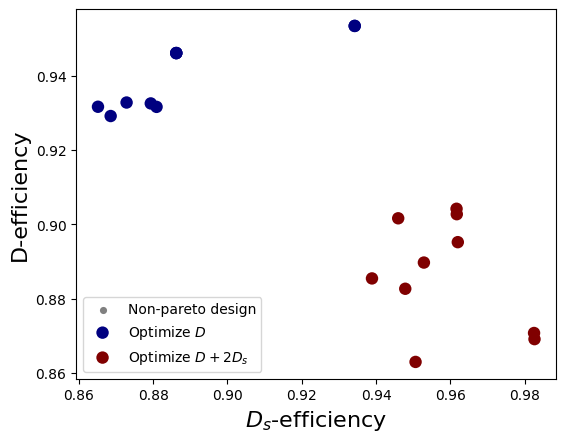

<Figure size 640x480 with 0 Axes>

In [6]:
def combineEfficiencyData(lst):
    data = np.zeros((0, 4))

    for jj, dds in enumerate(lst):
        dds_index = np.hstack((dds, jj * np.ones((len(dds), 1))))
        data = np.vstack((data, dds_index))
    return data


design_efficiencies_combined = combineEfficiencyData([design_efficiencies0, design_efficiencies])
plot_handles = oapackage.generateDscatter(
    design_efficiencies_combined, ndata=3, lbls=["Optimize $D$", "Optimize $D+2D_s$"], verbose=0
)